## Diabetis prediction using Decision Trees Regressor


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
ds = load_diabetes()

In [4]:
print(ds['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [8]:
df = pd.DataFrame(ds.data, columns = ['age'    
    ,'sex'
    ,'bmi'     
     ,'bp'      
    ,'s1'     
    ,'s2'      
    , 's3'      
    , 's4 '    
    , 's5'     
     ,'s6'])

In [9]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
X = df
y = ds['target']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=10)

<Axes: >

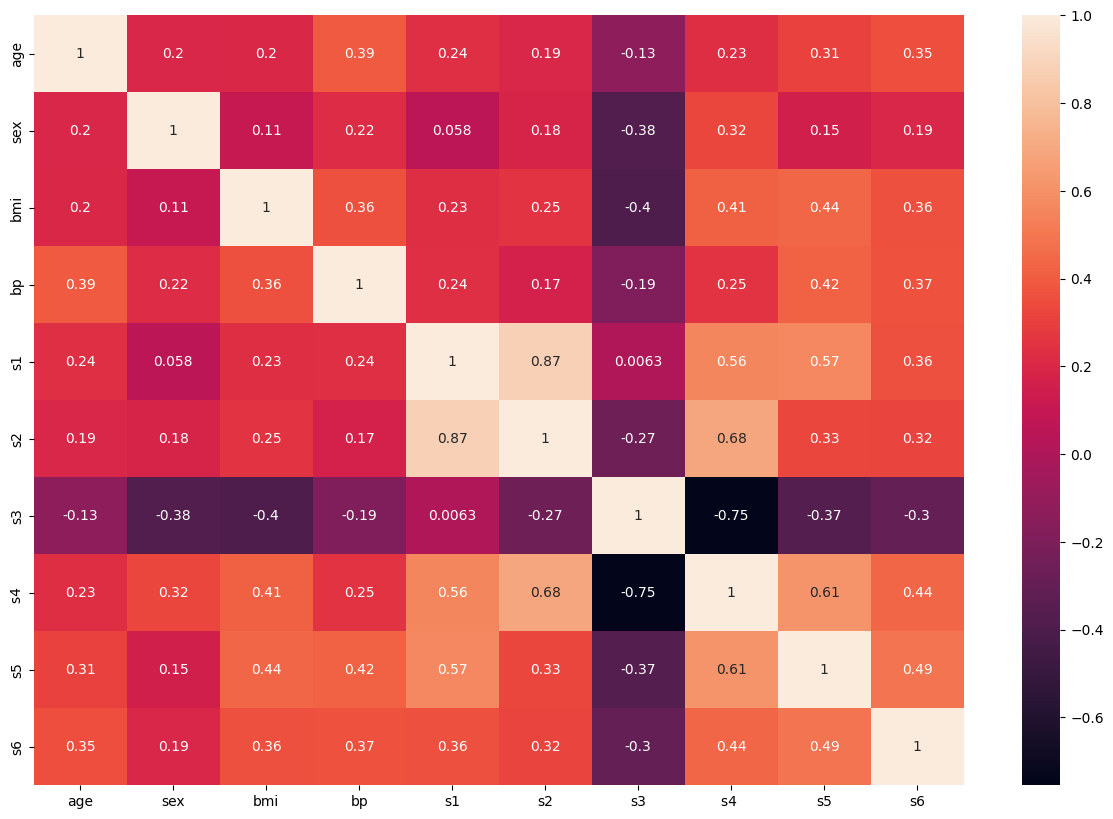

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(), annot=True)

In [13]:
from sklearn.tree import DecisionTreeRegressor
dsr = DecisionTreeRegressor()
dsr.fit(X_train,y_train)

DecisionTreeRegressor()

In [14]:
params = { 
    'criterion' :[ "squared_error", "friedman_mse", "absolute_error"],
    'splitter' : ["best","random"],
    'max_depth': [1,2,3,4,5,10,15,20,25],
    'max_features' : ["auto","sqrt", 'log2']
}

In [15]:
from sklearn.model_selection import GridSearchCV
gsvreg = GridSearchCV(DecisionTreeRegressor(), param_grid=params, cv = 5, scoring='neg_mean_squared_error')

In [17]:
gsvreg.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [18]:
y_pred1 = gsvreg.predict(X_test)

In [19]:
gsvreg.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [21]:
print(r2_score(y_test,y_pred1))
print(mean_absolute_error(y_test,y_pred1))
print(mean_squared_error(y_test, y_pred1))

0.19254734439126364
59.41668862379836
5109.294829501268
